In [17]:
import numpy as np
import random
import matplotlib.pyplot as plt

def sim_anneal(max_T=2000, min_T=50, T_step=1, fitness_func=None, space=None, opt=0):
    assert fitness_func is not None
    assert space is not None

    max_iter = int((max_T-min_T)/T_step)
    curr_T = max_T

    idx = random.randint(0, len(space))
    curr = space[idx]

    for i in range(max_iter):
#         print("simulated annuealing: {}|{}".format(i+1, max_iter))
        idx = random.randint(0, len(space)-1)
        if fitness_func(space[idx])>=fitness_func(curr):
            curr = space[idx]
        else:
            p = np.exp((fitness_func(space[idx])-fitness_func(curr))/curr_T)
            p_bench = random.uniform(0,1)
            if p>=p_bench:
                curr = space[idx]
        curr_T -= T_step
        if isinstance(curr, str):
            if fitness_func(curr) == opt:
                break
        else:
            if np.abs(curr-opt) < 1e-6:
                break
    return i+1, curr

def sim_anneal_queen(max_T=20, min_T=2, T_step=0.1, fitness_func=None, n=4):
    chess = update_chess(n)

    curr_T = max_T
    max_iter = int((max_T-min_T)/T_step)
    for i in range(max_iter):
        print("simulated annuealing: {}|{}".format(i+1, max_iter))
        new_chess = update_chess(n)
        print(fitness_func(new_chess),fitness_func(chess))
        if fitness_func(new_chess) > fitness_func(chess):
            chess = new_chess
        else:
            p = np.exp((fitness_func(new_chess)-fitness_func(chess))/curr_T)
            p_bench = random.uniform(0,1)
            if p>=p_bench:
                chess = new_chess
        curr_T -= T_step
    return chess

def update_chess(n):
    chess = np.zeros([n,n])
    ipos = []
    for i in range(10000):
        irow, icol = np.random.randint(0,n), np.random.randint(0,n)
        if [irow, icol] not in ipos: ipos.append([irow, icol])
        if len(ipos) == n: break
    for pos in ipos:
        chess[pos[0],pos[1]] = 1
    return chess

In [21]:
"""
polynomial problem
"""
def fitness_func(x):
    return (x-11)*(x-5)*(x-14)*(x-3)*(x-13)*(x-9)*(x-6.4)*(x-18)*(x-18.5)*(x-2.8)*(x-19.1)

space = np.arange(2.2,18,0.1)
opt = 5.6

iter_list = []
results = []
for i in range(100):
    iteration, result = sim_anneal(max_T=1000000, min_T=5000, T_step=10000, fitness_func=fitness_func, space=space, opt=opt)
# print("x for global maximum value is: {}".format(result))
    iter_list.append(iteration)
    results.append(result)

Text(0.5,0,'convergence value')

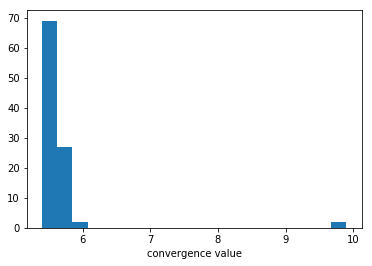

In [24]:
plt.hist(results, bins=20)
plt.xlabel("convergence value")

Text(0.5,0,'number of iterations')

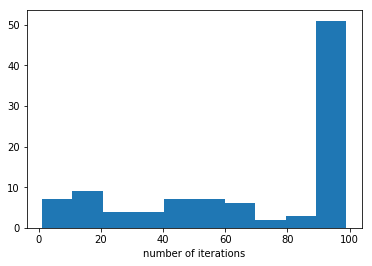

In [26]:
plt.hist(iter_list)
plt.xlabel("number of iterations")